In [1]:
import sys
import os

import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot as plt
import numpy as np

sys.path.append(os.getcwd())
from load_data import *
from plotting_tools import *
from crystalcluster import CrystalCluster

sys.path.append('../3_score/')
from optimize import Scores
from fingerprint import FuzzyFingerPrint

In [ ]:
## useful class specifications:
# Ligand -- attributes: crystal (currently not used/none), poses (dict of pose_num:pose).
# Pose -- attributes: rmsd (float), fp (Fingerprint, num (integer), gscore (float)
# FuzzyFingerPrint -- attributes: pdb, feats (dict of residue name:interaction list).

# crystals: maps structures to Poses, 
#           e.g., crystals['4LDO'] = Pose(rmsd=0, fingerprint, num=0, gscore=0)
# glides:   maps ligand_struct, grid_struct to Ligands, 
#           e.g., glides['4LDO']['4LDO'] = Ligand(...)

receptor = 'pdbbind_final/P18031'
(xcrystals, xglides, ligs, structs) = load_data(receptor,
                                                w=[0,0,10,10,10,5,10,10,0,0.2,0,0,0],
                                                require_fp=True,
                                                combine_structs=False,
                                                glide_ifp='ifp/xglide_5',
                                                crystal_ifp='ifp/xcrystal6',
                                                load_docking=True)

In [2]:
import numpy as np

class ProteinCluster:
    def __init__(self, structs, alignments):
        self.structs = structs
        self.a = alignments
        self.a_mat = self.get_a_mat()
        
    def get_a_mat(self):
        a_mat = {}
        for r in self.a:
            a_mat[r] = 10*np.ones( (len(self.structs), len(self.structs)) )
            for (s1, s2, rmsd) in self.a[r]:
                (i1, i2) = self.structs.index(s1), self.structs.index(s2)
                a_mat[r][min(i1,i2), max(i1,i2)] = rmsd
        return a_mat
            

pdbbind_final/P19491
Loading crystal structures...
Loading glidescores...
0 of 24 total pairs failed to dock.
Loading fingerprints...
Loading docking results...


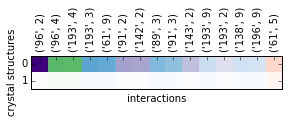

/share/PI/rondror/software/miniconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


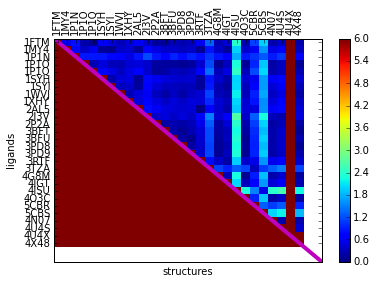

pdbbind_final/P06202
Loading crystal structures...
Loading glidescores...
6 of 58 total pairs failed to dock.
Loading fingerprints...
Loading docking results...


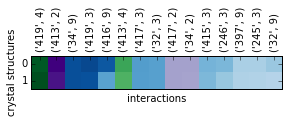

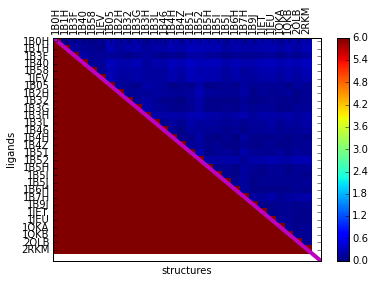

pdbbind_final/P00749
Loading crystal structures...
Loading glidescores...
0 of 28 total pairs failed to dock.
Loading fingerprints...
Loading docking results...


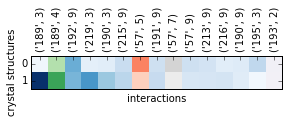

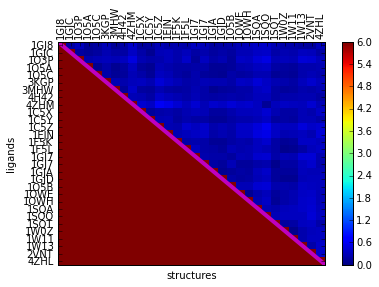

pdbbind_final/P03367
Loading crystal structures...
Loading glidescores...
1 of 42 total pairs failed to dock.
Loading fingerprints...
Loading docking results...


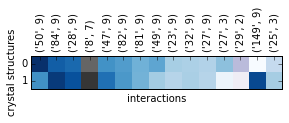

[('50', 'VAL'), ('50', 'ILE')]


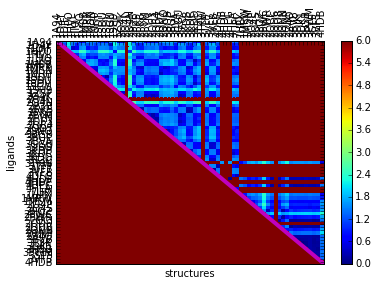

pdbbind_final/P00760
Loading crystal structures...
Loading glidescores...
0 of 196 total pairs failed to dock.
Loading fingerprints...
Loading docking results...


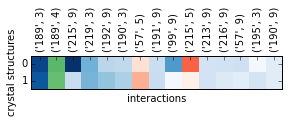

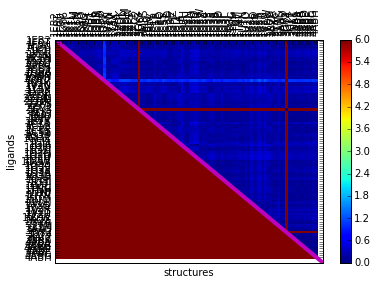

pdbbind_final/P18031
Loading crystal structures...
Loading glidescores...
0 of 39 total pairs failed to dock.
Loading fingerprints...
Loading docking results...


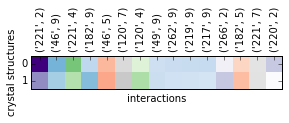

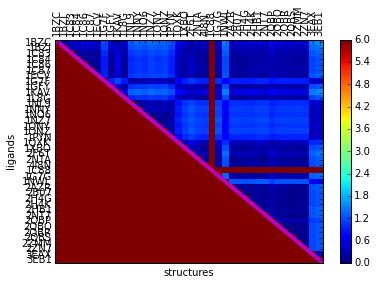

pdbbind_final/P00489
Loading crystal structures...
Loading glidescores...
0 of 26 total pairs failed to dock.
Loading fingerprints...
Loading docking results...


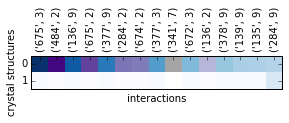

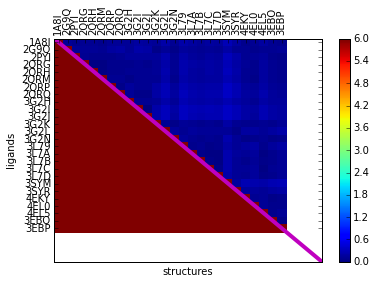

pdbbind_final/P00918
Loading crystal structures...
Loading glidescores...
0 of 191 total pairs failed to dock.
Loading fingerprints...
Loading docking results...
1


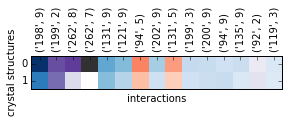

pdbbind_final/P61823
Loading crystal structures...
Loading glidescores...
0 of 28 total pairs failed to dock.
Loading fingerprints...
Loading docking results...


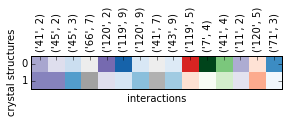

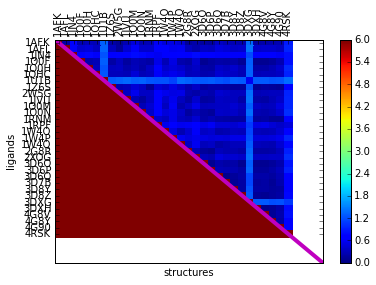

pdbbind_final/P03366
Loading crystal structures...
Loading glidescores...
0 of 45 total pairs failed to dock.
Loading fingerprints...
Loading docking results...


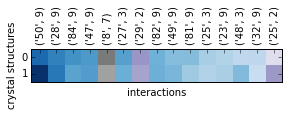

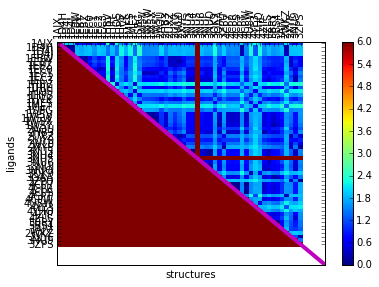

pdbbind_final/P39900
Loading crystal structures...
Loading glidescores...
0 of 24 total pairs failed to dock.
Loading fingerprints...
Loading docking results...


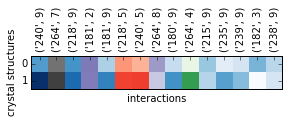

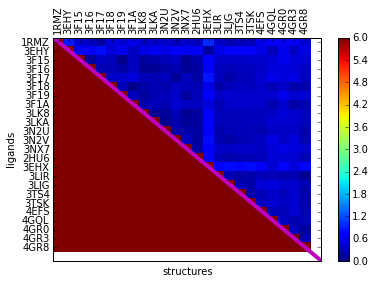

pdbbind_final/Q9Y233
Loading crystal structures...
Loading glidescores...
0 of 24 total pairs failed to dock.
Loading fingerprints...
Loading docking results...


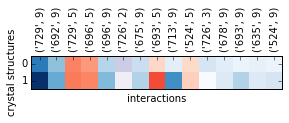

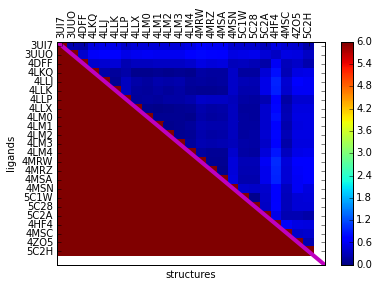

pdbbind_final/P00734
Loading crystal structures...
Loading glidescores...
0 of 83 total pairs failed to dock.
Loading fingerprints...
Loading docking results...


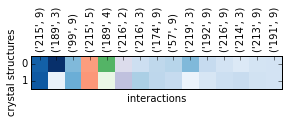

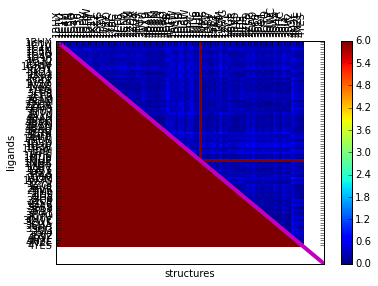

pdbbind_final/Q16539
Loading crystal structures...
Loading glidescores...
0 of 25 total pairs failed to dock.
Loading fingerprints...
Loading docking results...


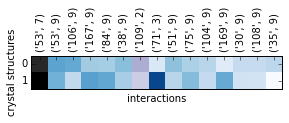

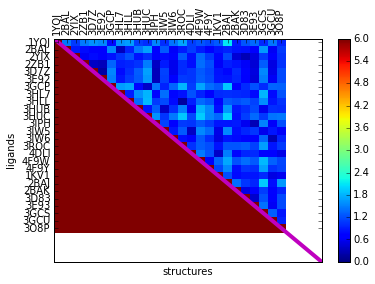

pdbbind_final/P00742
Loading crystal structures...
Loading glidescores...
0 of 64 total pairs failed to dock.
Loading fingerprints...
Loading docking results...


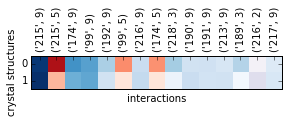

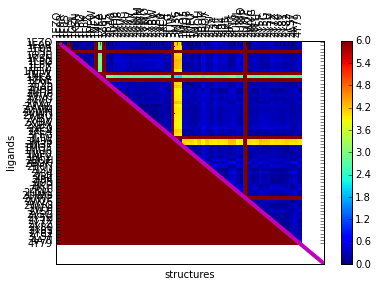

pdbbind_final/P0A5R0
Loading crystal structures...
Loading glidescores...
0 of 22 total pairs failed to dock.
Loading fingerprints...
Loading docking results...


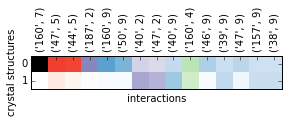

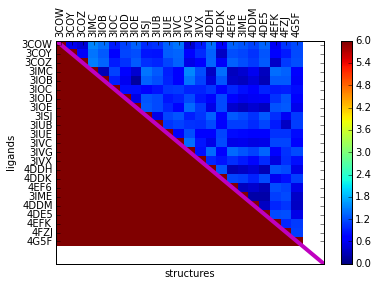

pdbbind_final/P56817
Loading crystal structures...
Loading glidescores...
0 of 35 total pairs failed to dock.
Loading fingerprints...
Loading docking results...


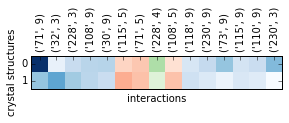

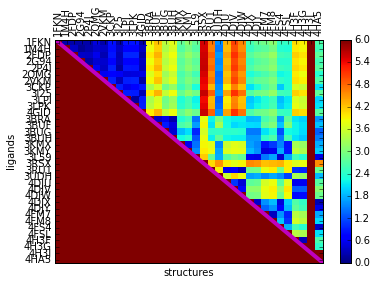

pdbbind_final/P04587
Loading crystal structures...
Loading glidescores...
0 of 13 total pairs failed to dock.
Loading fingerprints...
Loading docking results...


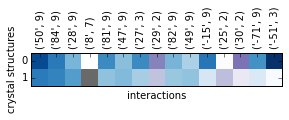

[('50', 'VAL'), ('50', 'ILE')]


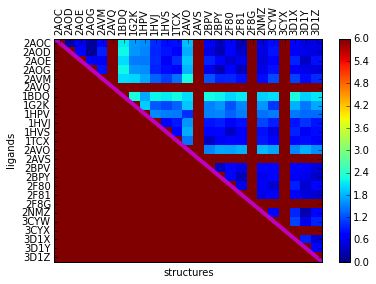

pdbbind_final/P07900
Loading crystal structures...
Loading glidescores...
0 of 60 total pairs failed to dock.
Loading fingerprints...
Loading docking results...


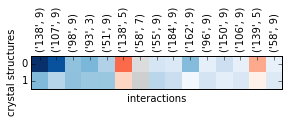

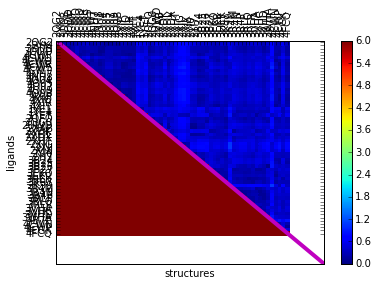

pdbbind_final/P28720
Loading crystal structures...
Loading glidescores...
0 of 22 total pairs failed to dock.
Loading fingerprints...
Loading docking results...


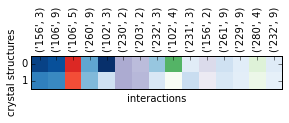

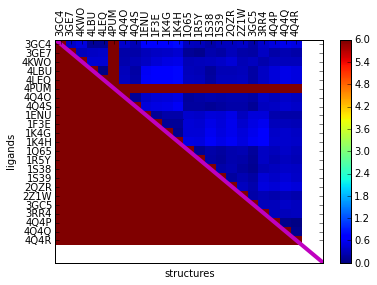

In [3]:
get_ipython().magic(u'matplotlib inline')


for receptor in ['pdbbind_final/{}'.format(r) for r in os.listdir('/scratch/PI/rondror/docking_data/pdbbind_final')]:
    print receptor
    
    (xcrystals, xglides, ligs, structs) = load_data(receptor,
                                                    w=[0,0,10,10,10,5,10,10,10,0.2,0,0,0],
                                                    require_fp=True,
                                                    combine_structs=False,
                                                    glide_ifp='ifp/xglide_5',
                                                    crystal_ifp='ifp/xcrystal6',
                                                    load_docking=True)

    cc = CrystalCluster(xcrystals, 2, [2,3,4,5,7,8,9])

    #cc.show_clusters_together()
    cc.show_cluster_centers()
    #cc.show_clusters_individually()
    try: 
        a = parse_alignment_file(receptor)
        pc = ProteinCluster(cc.sorted_ligs, a)
        r = [i for i in pc.a_mat.keys() if i[0] == cc.all_i[0][0]]
        if len(r) > 1:
            print r
        r = r[-1]
        heatmap(pc.a_mat[r], cc.sorted_ligs, cc.sorted_ligs, red=6)
    except: continue

In [ ]:
get_ipython().magic(u'matplotlib inline')

pc = ProteinCluster(cc.sorted_ligs, a)
r = [i for i in pc.a_mat.keys() if i[0] == '182'][0]
heatmap(pc.a_mat[r], cc.sorted_ligs, cc.sorted_ligs, red=4)
#heatmap(pc.a_mat[('61','TYR')], cc.sorted_ligs, cc.sorted_ligs, red=4)
#heatmap(pc.a_mat[('471','TYR')], cc.sorted_ligs, cc.sorted_ligs, red=4)

In [ ]:
print [i for i in a[('471','TYR')]]# if '4G8M' in i]

In [ ]:
get_ipython().magic(u'matplotlib inline')

fixed_a = {r[0]:a[r] for r in a}

for res, itype in all_interactions[:num_i]:
    plt.plot([i[2] for i in fixed_a[res]])
    plt.title(res)
    plt.show()